In [1]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Plotting in Python

https://matplotlib.org/gallery.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
xdata = np.linspace(0,5,100)
ydata = np.sqrt(xdata)

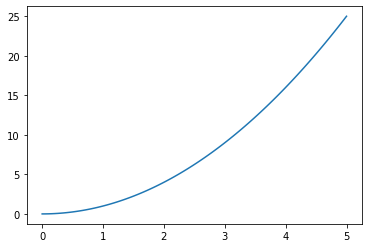

In [7]:
plt.plot(xdata, ydata)

Text(0.5, 1.0, 'My first plot')

Text(0.5, 0, 'x values')

Text(0, 0.5, 'y values')

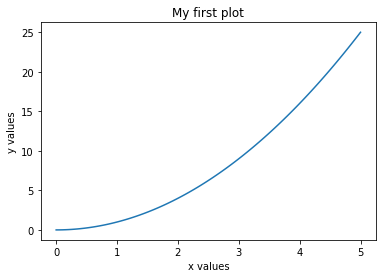

In [8]:
plt.plot(xdata, ydata)
plt.title("My first plot")
plt.xlabel("x values")
plt.ylabel("y values")

Text(0.5, 1.0, 'My first plot')

Text(0.5, 0, 'x values')

Text(0, 0.5, 'y values')

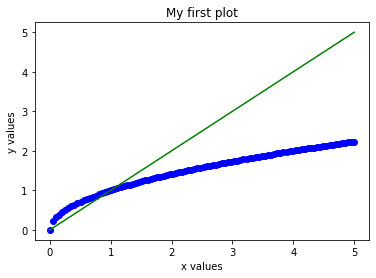

In [10]:
plt.plot(xdata, ydata, "bo", xdata, ydata ** 2, "g-")
plt.title("My first plot")
plt.xlabel("x values")
plt.ylabel("y values")

<AxesSubplot:>

Text(0.5, 1.0, 'subplot 1')

<AxesSubplot:>

Text(0.5, 1.0, 'subplot 2')

Text(0.5, 0.98, 'my first subplots')

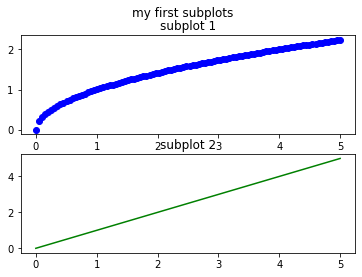

In [11]:
#subplot(nrows, ncols, index)
plt.subplot(2,1,1)
plt.plot(xdata, ydata, "bo")
plt.title("subplot 1")

plt.subplot(2,1,2)
plt.plot(xdata, ydata ** 2, "g-")
plt.title("subplot 2")

plt.suptitle("my first subplots")

Text(0.5, 1.0, 'second subplot')

Text(0.5, 1.0, 'first subplot')

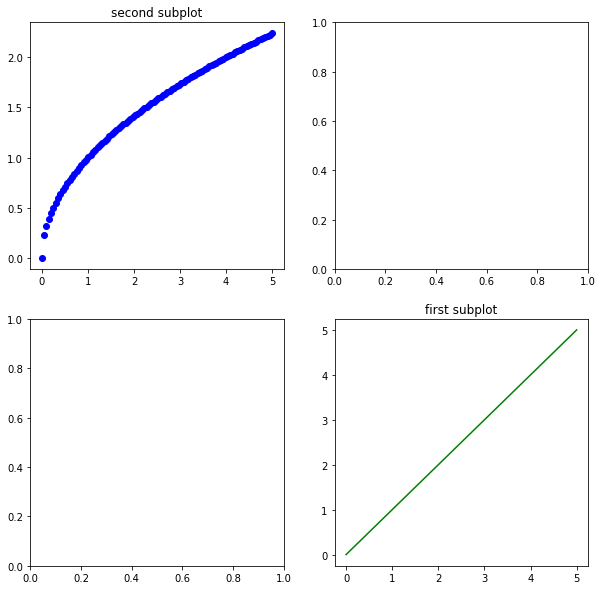

In [13]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(10,10))
ax[0,0].plot(xdata, ydata, "bo")
ax[0,0].set_title("second subplot")

ax[1,1].plot(xdata, ydata ** 2, "g-")
ax[1,1].set_title("first subplot")

# Exploratory Data Analysis

We will use Pandas and Matplotlib modules in this workbook. Seaborn module also has good visualizations methods. You are welcome to explore on your own.

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [16]:
ames = pd.read_csv("../Data/AmesHousing.csv", index_col="Order")
ames.columns = ames.columns.str.replace(' ', '')
ames.columns = [col.lower() for col in ames]
ames.columns

Index(['pid', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremod/add', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddri

In [17]:
ames.head()

,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<AxesSubplot:xlabel='Order'>

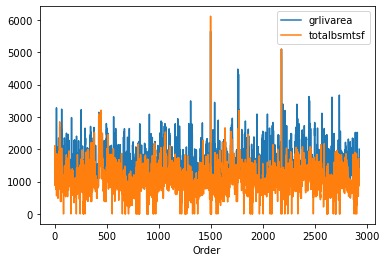

In [19]:
#ames['saleprice'].plot()

ames[['grlivarea','totalbsmtsf']].plot()

### Histogram

array([[<AxesSubplot:title={'center':'saleprice'}>]], dtype=object)

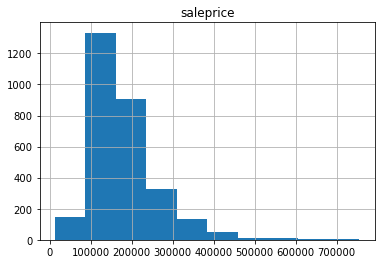

In [21]:
ames[['saleprice']].hist(bins=10)

<AxesSubplot:title={'center':'Histogram: A vs. B'}, ylabel='Density'>

<AxesSubplot:title={'center':'Histogram: A vs. B'}, ylabel='Frequency'>

Text(0, 0.5, 'Probability')

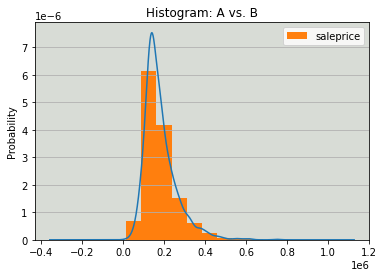

In [22]:
fig, ax = plt.subplots()
ames[['saleprice']].plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
ames[['saleprice']].plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

<AxesSubplot:ylabel='Frequency'>

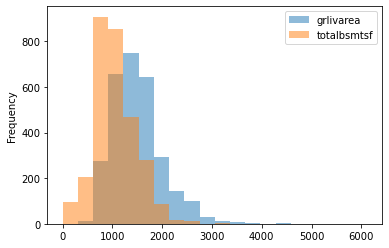

In [27]:
#ames[['grlivarea','totalbsmtsf']].hist(bins=20)
ames[['grlivarea','totalbsmtsf']].plot.hist(bins=20, alpha =.5)

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Sale price Histogram')

Text(300000, 230, 'Sample Mean Sale Price: $180,796')

(0.0, 320.0)

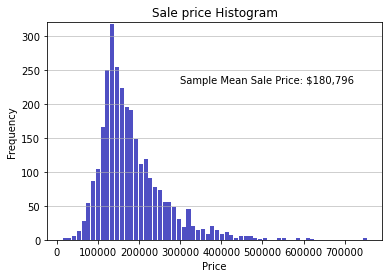

In [28]:
n, bins, patches = plt.hist(x=ames[['saleprice']], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.title('Sale price Histogram')
plt.text(300000, 230, 'Sample Mean Sale Price: $180,796')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


### Probability Plot

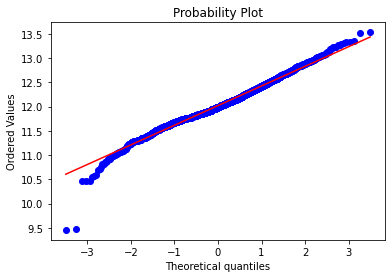

In [30]:
fig = plt.figure()
res = stats.probplot(np.log(ames['saleprice']), plot=plt)

### Bar Chart

<BarContainer object of 4 artists>

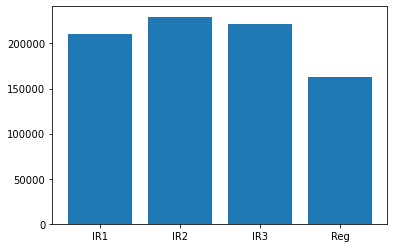

In [32]:
yax = ames.groupby(['lotshape'])['saleprice'].mean()
plt.barh(yax.index, yax)

Text(0, 0.5, 'Square Footage')

Text(0.5, 1.0, 'Squar footage living vs basement')

([<matplotlib.axis.XTick at 0x23c4f85b388>,
 [Text(0, 0, '1Fam'),
  Text(1, 0, '2fmCon'),
  Text(2, 0, 'Duplex'),
  Text(3, 0, 'Twnhs'),
  Text(4, 0, 'TwnhsE')])

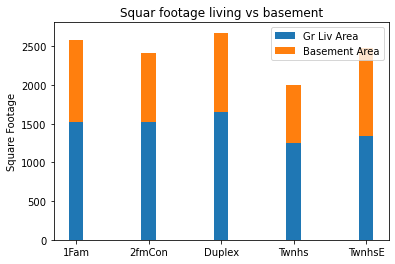

In [34]:
yax1 = ames.groupby(['bldgtype'])['grlivarea'].mean()
yax2 = ames.groupby(['bldgtype'])['totalbsmtsf'].mean()
ind = np.arange(yax1.shape[0])    # the x locations for the groups
width = 0.20       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, yax1, width)
#p2 = plt.bar(ind+ width, yax2, width)
p2 = plt.bar(ind, yax2, width, bottom=yax1)

plt.ylabel('Square Footage')
plt.title('Squar footage living vs basement')
plt.xticks(ind, yax2.index)
#plt.yticks(np.arange(0, 1000, 8000))
plt.legend((p1[0], p2[0]), ('Gr Liv Area', 'Basement Area'))

plt.show()

### Boxplot

Text(0.5, 1.0, 'Basic Plot')

{'whiskers': [<matplotlib.lines.Line2D at 0x23c4f8f2f48>,
 'caps': [<matplotlib.lines.Line2D at 0x23c4f90fd08>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c4f906ec8>],
 'medians': [<matplotlib.lines.Line2D at 0x23c4f90fe48>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c4f916c88>],
 'means': []}

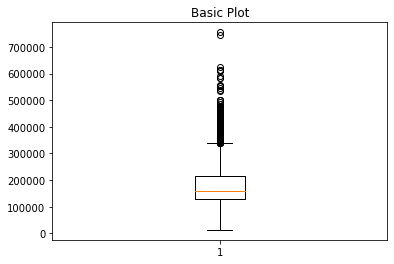

In [35]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(ames['saleprice'])

<AxesSubplot:title={'center':'saleprice'}, xlabel='[neighborhood]'>

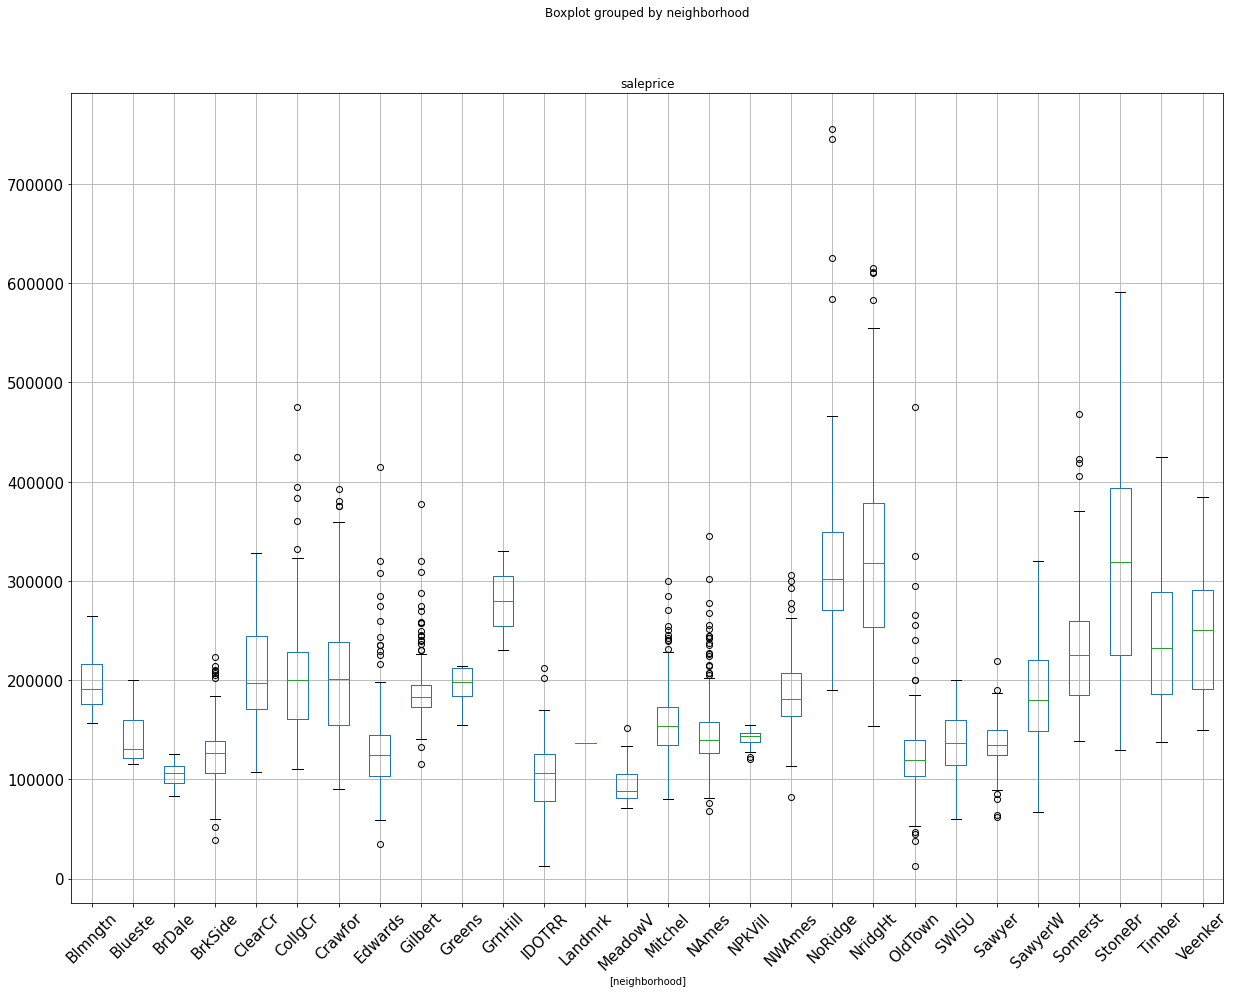

In [37]:
ames[['saleprice','neighborhood']].boxplot(column=['saleprice'], by=['neighborhood']
                                           ,rot=45, fontsize=15, figsize=(20,15))

### Scatter Plot

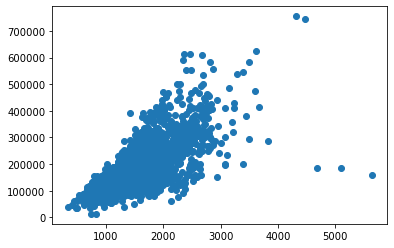

In [39]:
plt.scatter(ames['grlivarea'],ames['saleprice'])

array([[<AxesSubplot:xlabel='saleprice', ylabel='saleprice'>,
        <AxesSubplot:xlabel='grlivarea', ylabel='saleprice'>,
        <AxesSubplot:xlabel='totalbsmtsf', ylabel='saleprice'>,
        <AxesSubplot:xlabel='overallqual', ylabel='saleprice'>],
       [<AxesSubplot:xlabel='saleprice', ylabel='grlivarea'>,
        <AxesSubplot:xlabel='grlivarea', ylabel='grlivarea'>,
        <AxesSubplot:xlabel='totalbsmtsf', ylabel='grlivarea'>,
        <AxesSubplot:xlabel='overallqual', ylabel='grlivarea'>],
       [<AxesSubplot:xlabel='saleprice', ylabel='totalbsmtsf'>,
        <AxesSubplot:xlabel='grlivarea', ylabel='totalbsmtsf'>,
        <AxesSubplot:xlabel='totalbsmtsf', ylabel='totalbsmtsf'>,
        <AxesSubplot:xlabel='overallqual', ylabel='totalbsmtsf'>],
       [<AxesSubplot:xlabel='saleprice', ylabel='overallqual'>,
        <AxesSubplot:xlabel='grlivarea', ylabel='overallqual'>,
        <AxesSubplot:xlabel='totalbsmtsf', ylabel='overallqual'>,
        <AxesSubplot:xlabel='overallqua

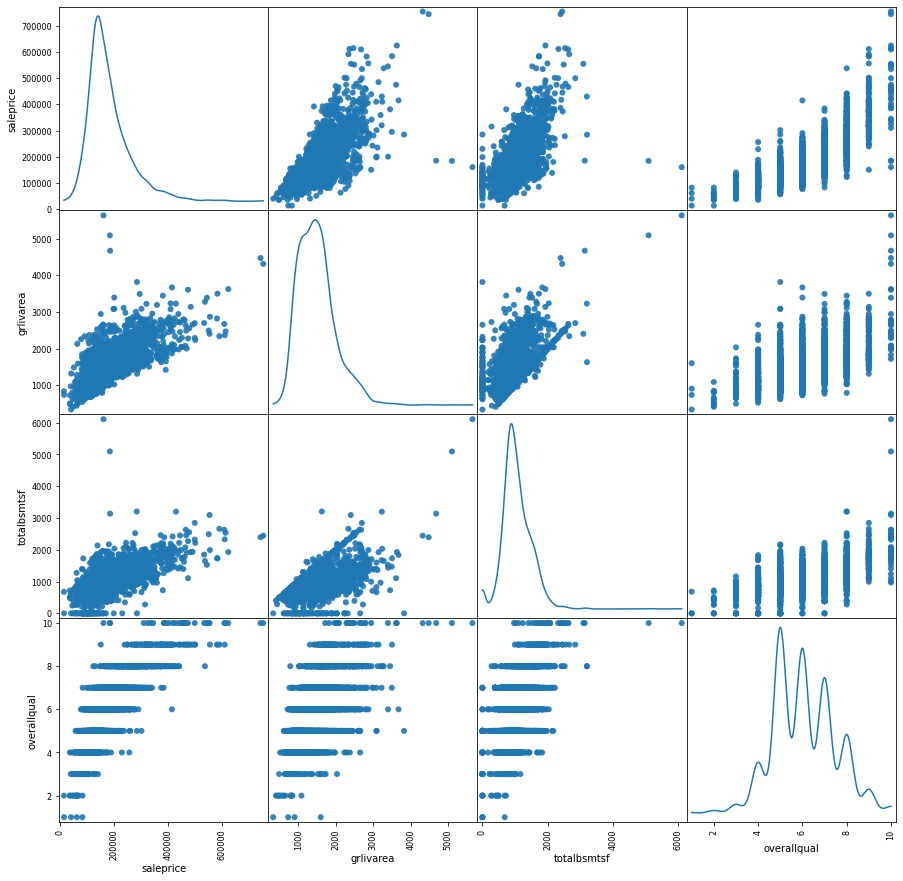

In [40]:
subsetd = ames[['saleprice','grlivarea','totalbsmtsf', 'overallqual']]
pd.plotting.scatter_matrix(subsetd, alpha=0.9, marker="o", figsize=(15,15),diagonal = 'kde', grid=True)

### Correlation 

In [41]:
subsetd.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,saleprice,grlivarea,totalbsmtsf,overallqual
saleprice,1.00,0.71,0.63,0.80
grlivarea,0.71,1.00,0.44,0.57
totalbsmtsf,0.63,0.44,1.00,0.55
overallqual,0.80,0.57,0.55,1.00


## Reference

### Adding annotation or  text to plots
https://matplotlib.org/3.1.1/tutorials/text/text_intro.html#:~:text=%20%20%20%20pyplot%20API%20%20,Axes%20's%20y-axis.%20%203%20more%20rows

### Pandas Boxplot documentation
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

### Blog on plotting basics
https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596